<a href="https://colab.research.google.com/github/Daviaraujos/AmazonFires/blob/main/Fires_in_the_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fires in the Amazon**

Este trabalho visa fornecer informações e análises sobre os incêndios florestais na região amazônica no período de 1998 até 2017 por meio do tratamento dos dados.

Espero contribuir com a comunidade de analistas de dados e, se possível, ajudar na conscientização da importância de nossa floresta para o público.

Fonte: https://github.com/YussifAdam1/AmazonFires

In [ ]:
# DownLoad de bibliotecas
!pip install num2words
!pip install matplotlib

# Bibliotecas
import pandas as pd
from datetime import date
import locale
import matplotlib.pyplot as plt




# Funções

def space():# Divisor
  print('______________________')
  print(' ')

def frase(texto):
  print(f'{texto}')

# Importando o banco
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTlAE0WV6WDD6qbIVHTMVci4ycxC9MPSqrfzDzMzvcdqk20GYGcLidbEd_fTk6At5sHb-cj-jOpWyZr/pub?gid=839780696&single=true&output=csv')

In [ ]:
df.head()

,year,state,month,number,date,data_formatada
0,1998,Acre,Janeiro,0.0,1998-01-01,01-01-1998
1,1999,Acre,Janeiro,0.0,1999-01-01,01-01-1999
2,2000,Acre,Janeiro,0.0,2000-01-01,01-01-2000
3,2001,Acre,Janeiro,0.0,2001-01-01,01-01-2001
4,2002,Acre,Janeiro,0.0,2002-01-01,01-01-2002


**Informações sobre o banco**

In [ ]:
# Mostrar informações sobre o banco
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
datas = df['date']
frase(datas)

0       1998-01-01
1       1999-01-01
2       2000-01-01
3       2001-01-01
4       2002-01-01
           ...    
6449    2012-01-01
6450    2013-01-01
6451    2014-01-01
6452    2015-01-01
6453    2016-01-01
Name: date, Length: 6454, dtype: object


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['data_formatada'] = df['date'].dt.strftime('%d-%m-%Y')

# Buscando a primeira última data do banco
primeira_data = df['data_formatada'].min()
ultima_data = df['data_formatada'].max()

# Quantidade de queimadas em todo o período.
total_queimadas = df['number'].sum()

# formatação do número para padrão brasileiro
total_queimadas_formatado = f'{total_queimadas:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Número extensivo
total_queimadas_extenso = num2words(total_queimadas, lang='pt_BR')


space()
print('No período de ', primeira_data,' até ', ultima_data, 'ocorreram ', total_queimadas_formatado,'queimadas (',total_queimadas_extenso,').')

______________________
 
No período de  01-01-1998  até  01-01-2017 ocorreram  698.924,07 queimadas ( seiscentos e noventa e oito mil, novecentos e vinte e quatro vírgula zero sete três ).


**Gráficos**

<ipython-input-250-f426404edd7a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


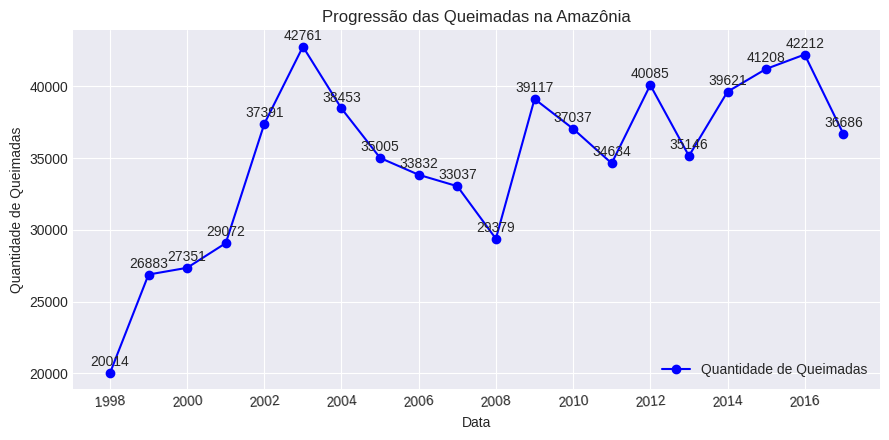

In [ ]:
# Estilo do gráfico
plt.style.use('seaborn-darkgrid')

#  Agrupar dados por mês para mostrar a progressão
df_grouped = df.groupby(df['date'].dt.to_period('M'))['number'].sum().reset_index()
df_grouped['date'] = df_grouped['date'].dt.to_timestamp()

# Criar o gráfico
fig, ax = plt.subplots(figsize=(9, 4.5))
ax.plot(df_grouped['date'], df_grouped['number'], marker='o', linestyle='-', color='b', label='Quantidade de Queimadas')

# Adicionar anotações em cada ponto do gráfico
for i, row in df_grouped.iterrows():
    ax.annotate(f'{row["number"]:.0f}', (row['date'], row['number']), textcoords="offset points", xytext=(0, 5), ha='center')

# Configurações do gráfico
ax.set_title('Progressão das Queimadas na Amazônia')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de Queimadas')
ax.legend()
ax.grid(True)
plt.xticks(rotation=4)
plt.tight_layout()
plt.show()


**Gráfico especifico**

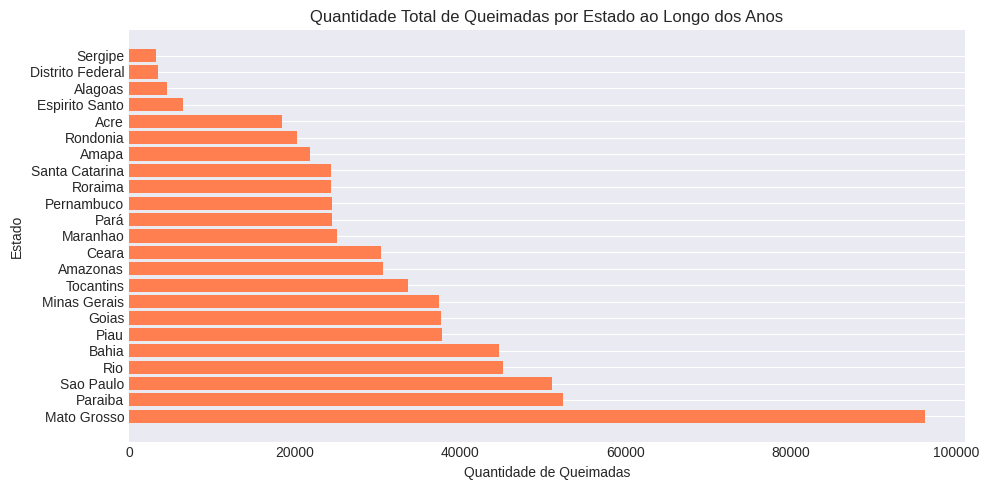

In [ ]:
# Agrupar os dados por estado e calcular a soma das queimadas
df_estados = df.groupby('state')['number'].sum().reset_index()

# Ordenar os estados pela quantidade total de queimadas (do maior para o menor)
df_estados = df_estados.sort_values(by='number', ascending=False)

# Criar um gráfico de barras para mostrar as queimadas por estado
plt.figure(figsize=(10, 5))
plt.barh(df_estados['state'], df_estados['number'], color='coral')

# Configurações do gráfico
plt.title('Quantidade Total de Queimadas por Estado ao Longo dos Anos')
plt.xlabel('Quantidade de Queimadas')
plt.ylabel('Estado')
plt.grid(axis='x')

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Média de queimadas por estado**

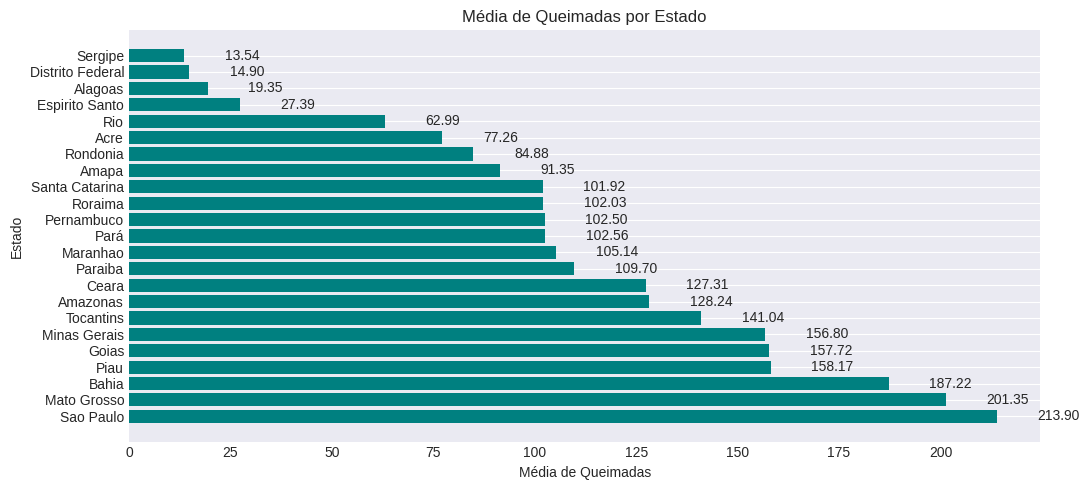

In [ ]:
# Certificando-se de que a coluna 'date' está no formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Calcular a média de queimadas por estado
df_estados_media = df.groupby('state')['number'].mean().reset_index()

# Ordenar os estados pela média de queimadas (do maior para o menor)
df_estados_media = df_estados_media.sort_values(by='number', ascending=False)

# Criar um gráfico de barras horizontal para mostrar a média de queimadas por estado
plt.figure(figsize=(11, 5))
bars = plt.barh(df_estados_media['state'], df_estados_media['number'], color='teal')

# Adicionar os valores médios em cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

# Configurações do gráfico
plt.title('Média de Queimadas por Estado')
plt.xlabel('Média de Queimadas')
plt.ylabel('Estado')
plt.grid(axis='x')

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Progresso das queimadas durante os anos**

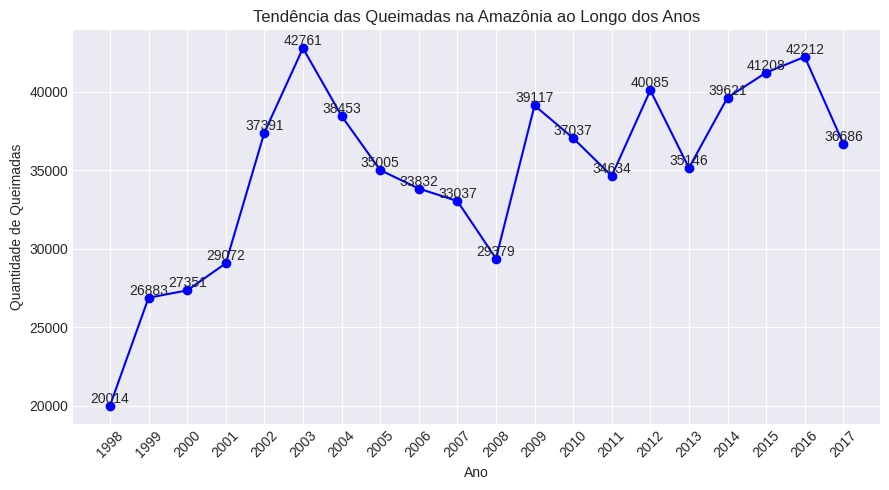

In [ ]:
df['year'] = df['date'].dt.year

df_annual = df.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(9, 5))
plt.plot(df_annual['year'], df_annual['number'], marker='o', linestyle='-', color='b')

for i, row in df_annual.iterrows():
    plt.text(row['year'], row['number'], f'{row["number"]:.0f}', ha='center', va='bottom')

plt.title('Tendência das Queimadas na Amazônia ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.grid(True)
plt.xticks(df_annual['year'], rotation=45)
plt.tight_layout()

plt.show()

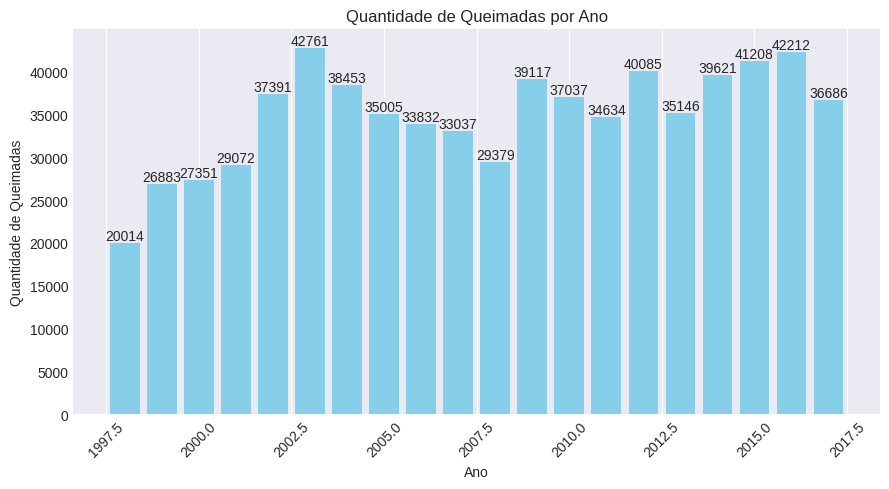

In [ ]:
# Certificando-se de que a coluna 'date' está no formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Extrair o ano das datas
df['year'] = df['date'].dt.year

# Agrupar os dados por ano e calcular a soma das queimadas
df_annual = df.groupby('year')['number'].sum().reset_index()

# Criar um gráfico de barras para mostrar as queimadas por ano
plt.figure(figsize=(9, 5))
plt.bar(df_annual['year'], df_annual['number'], color='skyblue')

# Adicionar os valores em cada barra
for i, row in df_annual.iterrows():
    plt.text(row['year'], row['number'], f'{row["number"]:.0f}', ha='center', va='bottom')

# Configurações do gráfico
plt.title('Quantidade de Queimadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()


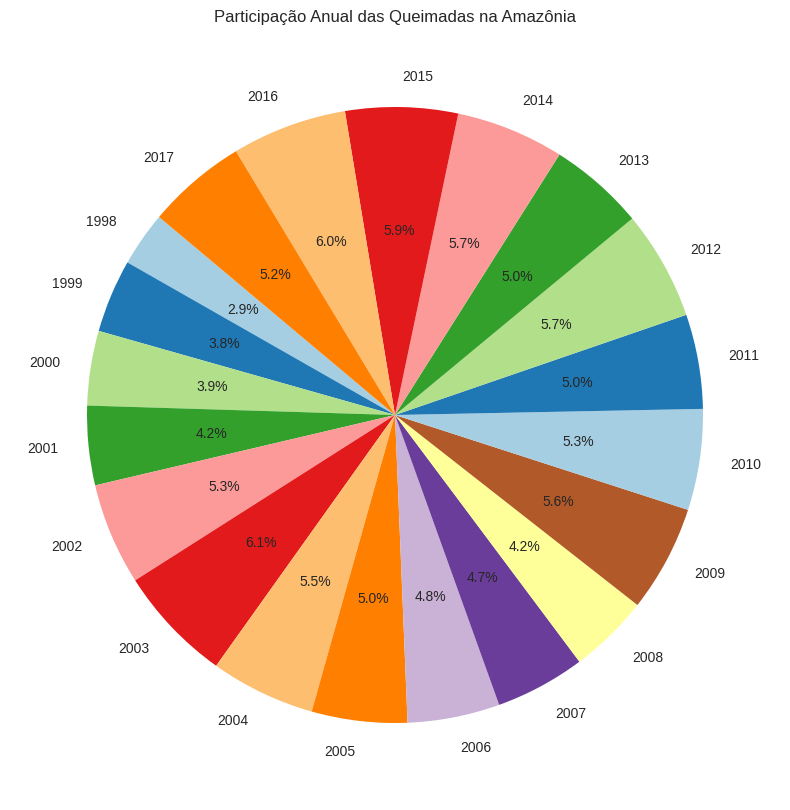

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_annual['number'], labels=df_annual['year'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Configurações do gráfico
plt.title('Participação Anual das Queimadas na Amazônia')
plt.show()


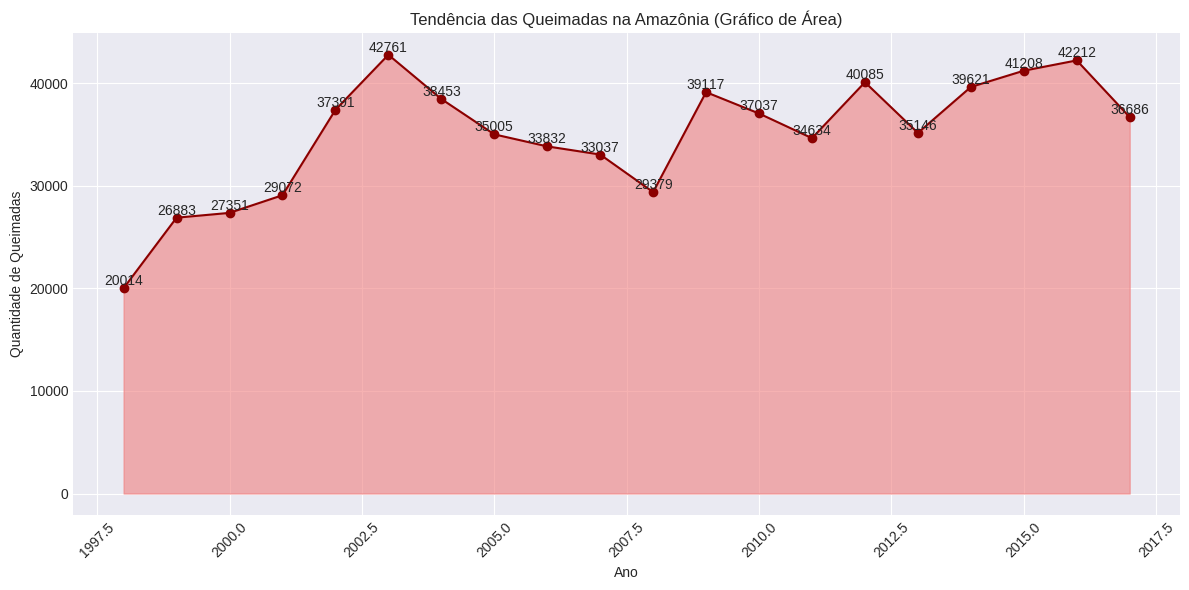

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_annual['year'], df_annual['number'], color='lightcoral', alpha=0.6)
plt.plot(df_annual['year'], df_annual['number'], marker='o', color='darkred')

# Adicionar os valores em cada ponto
for i, row in df_annual.iterrows():
    plt.text(row['year'], row['number'], f'{row["number"]:.0f}', ha='center', va='bottom')

# Configurações do gráfico
plt.title('Tendência das Queimadas na Amazônia (Gráfico de Área)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
